### Feature Engineering
Harry Arce


In [1]:
# Required Libraries import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from scipy import stats


In [2]:
# Load Data
houses_ds = pd.read_csv('PEP1.csv')

# Understand Data Set

In [3]:
#a.	Identify the shape of the dataset
houses_ds.shape

(1460, 81)

In [4]:
# inspect first 5 rows
houses_ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
houses_ds.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#b.	Identify variables with  null values
houses_ds.isna().any()


Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [7]:
#c.	Identify variables with unique values
rows = len(houses_ds)
for col in houses_ds:
    if rows == len(houses_ds[col].unique()):
        print(col)


Id


## Split data frames

In [8]:
# 2.	Generate a separate dataset for numerical and categorical variables
# only numerical features
numerical_feature_columns = list(houses_ds._get_numeric_data().columns)
del numerical_feature_columns[-1]
numerical_feature_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchebvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [9]:
# only categorical features
categorical_feature_columns = list(set(houses_ds.columns) - set(houses_ds._get_numeric_data().columns))
categorical_feature_columns

['LotConfig',
 'RoofStyle',
 'Functiol',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'Foundation',
 'Exterior2nd',
 'Street',
 'Exterior1st',
 'SaleCondition',
 'Condition1',
 'CentralAir',
 'Heating',
 'BsmtQual',
 'GarageType',
 'BsmtCond',
 'Electrical',
 'PoolQC',
 'BsmtFinType2',
 'BsmtExposure',
 'SaleType',
 'LotShape',
 'LandSlope',
 'PavedDrive',
 'Alley',
 'KitchenQual',
 'BsmtFinType1',
 'ExterQual',
 'Utilities',
 'HeatingQC',
 'LandContour',
 'FireplaceQu',
 'Neighborhood',
 'GarageFinish',
 'HouseStyle',
 'Condition2',
 'MiscFeature',
 'Fence',
 'MasVnrType',
 'MSZoning',
 'GarageCond',
 'GarageQual']

In [10]:
print(houses_ds.shape)
print(houses_ds.head())
# dataframe with numeric cols
houses_ds_num = houses_ds.select_dtypes(include='number')
print(houses_ds_num.shape)
print(houses_ds_num.head())

# dataframe with numeric cols
houses_ds_categ = houses_ds.select_dtypes(exclude='number')
print(houses_ds_categ.shape)
print(houses_ds_categ.head())



(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008  

## Numerical Variables

In [11]:
# 3.	EDA of numerical variables:
# a.	Missing value treatment
num_cols_withna = []
for (columnName, columnData) in houses_ds_num.iteritems(): 
    if (columnData.isna().sum(axis=0) > 0):
        num_cols_withna.append(columnName)
        print(columnName)
        print(columnData.isna().sum(axis=0))
        print ((columnData.isna().sum(axis=0)/houses_ds_num.shape[0])*100)
        print(columnData.describe())
        print()

# Impute missing values using 'mean' imputer
print(houses_ds_num.isna().any())
from sklearn.impute import SimpleImputer
import numpy as np
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imputer = mean_imputer.fit(houses_ds_num)
imputed_df = mean_imputer.transform(houses_ds_num.values)
houses_ds_num = pd.DataFrame(data=imputed_df, columns=houses_ds_num.columns)
print()
print(houses_ds_num.isna().any())

LotFrontage
259
17.73972602739726
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

MasVnrArea
8
0.547945205479452
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

GarageYrBlt
81
5.5479452054794525
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

Id               False
MSSubClass       False
LotFrontage       True
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea        True
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      

C:\Users\harceroj\AppData\Local\Temp\ipykernel_17196\2296480809.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in houses_ds_num.iteritems():
c:\Users\harceroj\Miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


C:\Users\harceroj\AppData\Local\Temp\ipykernel_17196\3649700183.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houses_ds[numerical_feature_columns[i]], hist=True, kde=False)
C:\Users\harceroj\AppData\Local\Temp\ipykernel_17196\3649700183.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(h

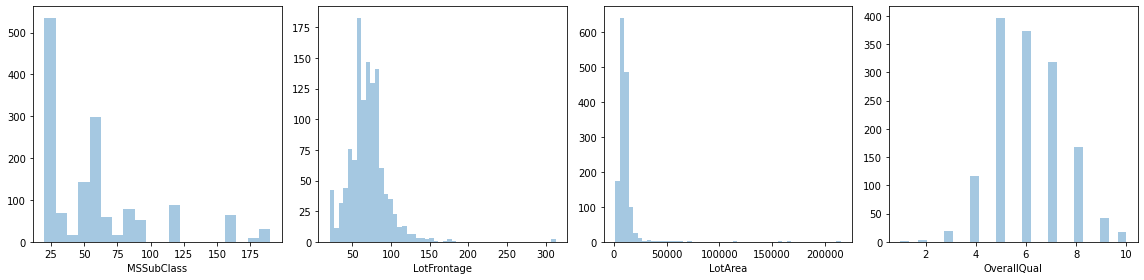

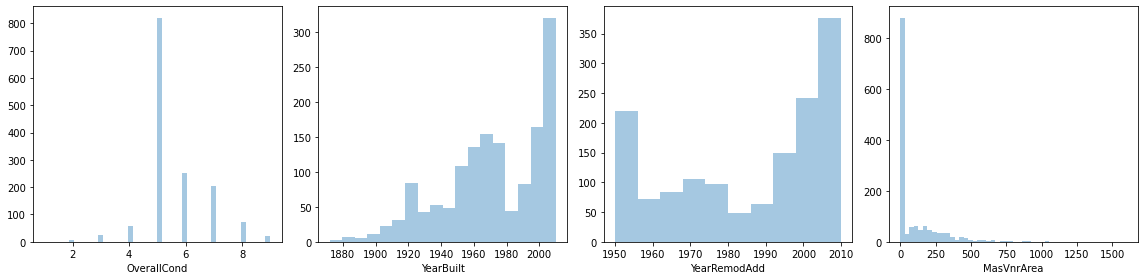

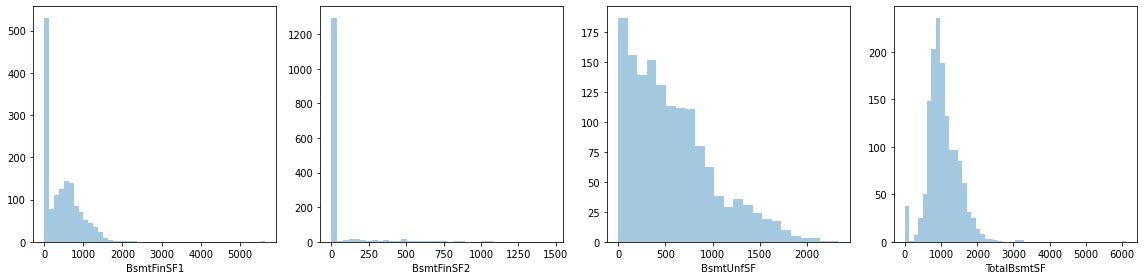

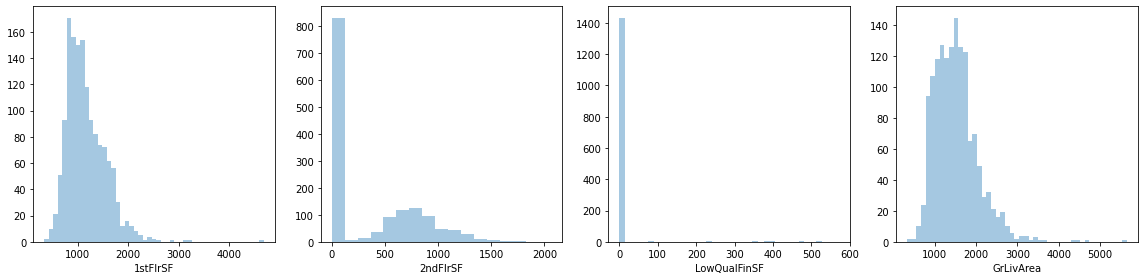

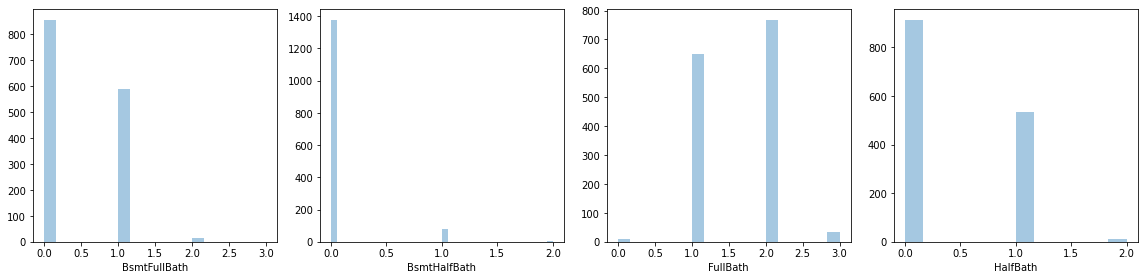

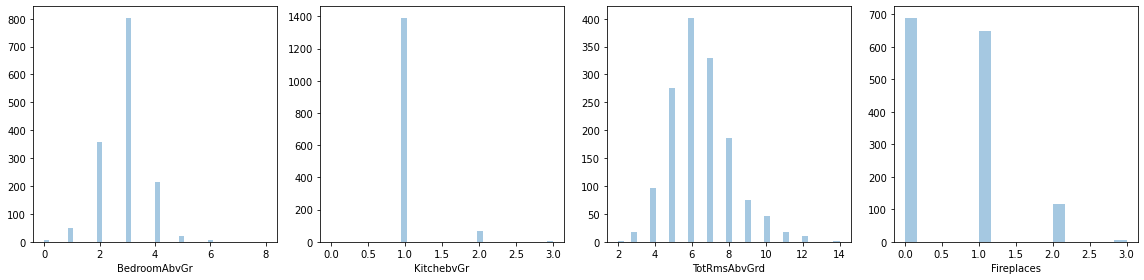

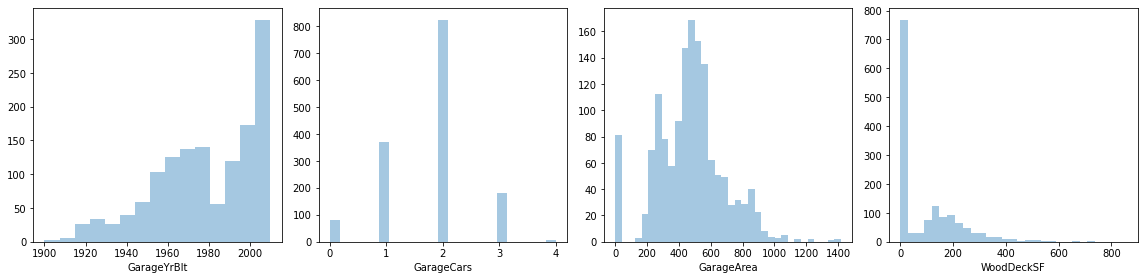

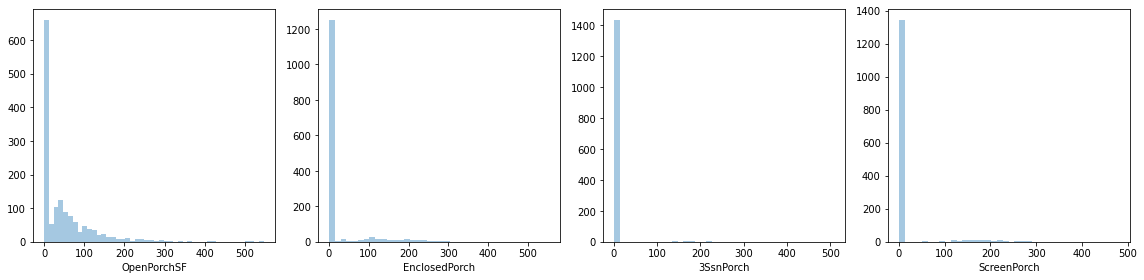

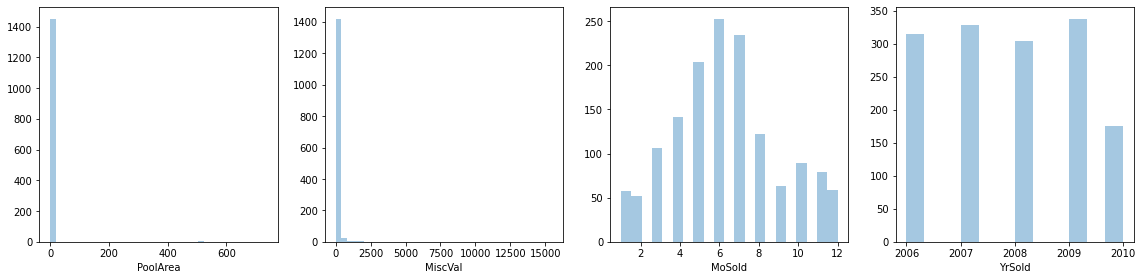

In [12]:
#b.	Identify the skewness and distribution

for i in range(1, len(numerical_feature_columns),4): #start,stop, jump
    plt.figure(figsize=(16,4))  # total area for plot are
    plt.subplot(141)   #make a subplot   1x2  1 axis   could be a plot if only one
    sns.distplot(houses_ds[numerical_feature_columns[i]], hist=True, kde=False) 
    if (i+1)<len(numerical_feature_columns):
        plt.subplot(142)    #make a subplot   1x2  2 axis
        sns.distplot(houses_ds[numerical_feature_columns[i+1]],kde=False)
    if (i+2)<len(numerical_feature_columns):
        plt.subplot(143)    #make a subplot   1x2  2 axis
        sns.distplot(houses_ds[numerical_feature_columns[i+2]],kde=False)
    if (i+3)<len(numerical_feature_columns):
        plt.subplot(144)    #make a subplot   1x2  2 axis
        sns.distplot(houses_ds[numerical_feature_columns[i+3]],kde=False)
    plt.tight_layout()
    plt.show()

C:\Users\harceroj\AppData\Local\Temp\ipykernel_17196\1947185775.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(houses_ds.corr(),cmap='rainbow')


<AxesSubplot: >

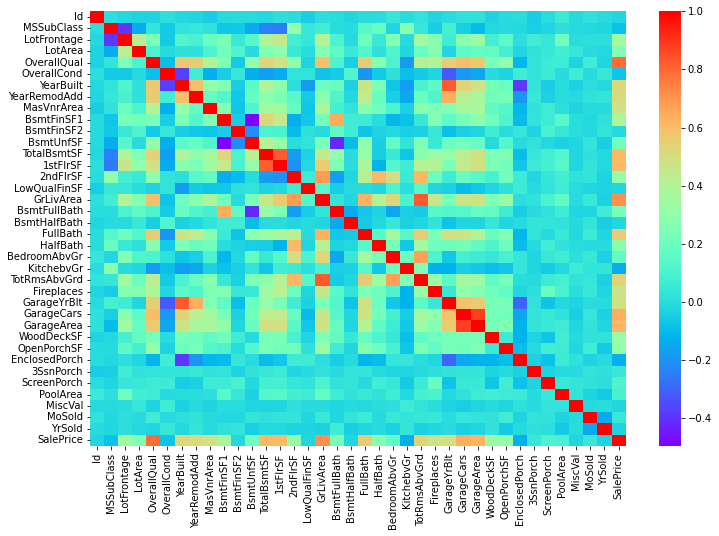

In [13]:
#c.	Identify significant variables using a correlation matrix 
plt.figure(figsize=(12,8))
sns.heatmap(houses_ds.corr(),cmap='rainbow')

C:\Users\harceroj\AppData\Local\Temp\ipykernel_17196\3880148826.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols = houses_ds.corr().nlargest(k, 'SalePrice')['SalePrice'].index


<AxesSubplot: >

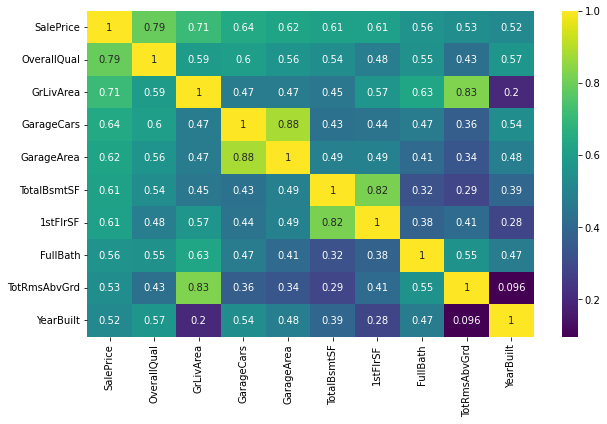

In [14]:
k = 10
cols = houses_ds.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm=houses_ds[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap='viridis')

#Variables to analyze for Correlation
YearBuilt vs GarageYrBlt
MSSubClass vs LotFrontage
OverallCond vs YearBuilt
BsmtFinSF1 vs BsmtUnfSF
BsmtUnfSF vs BsmtFullBath
OverallCond vs GarageYrBlt
GrLivArea vs TotRmsAbvGrd
YearBuilt vs EnclosedPorch
2ndFlrSF vs GrLivArea
GarageArea vs GarageCars

In [15]:
plt.figure(figsize=(4,4))
sns.lmplot('YearBuilt', 'GarageYrBlt',data=houses_ds, fit_reg=True)
plt.figure(figsize=(4,4))
sns.lmplot('MSSubClass', 'LotFrontage',data=houses_ds, fit_reg=True)
plt.figure(figsize=(4,4))
sns.lmplot('OverallCond', 'YearBuilt',data=houses_ds, fit_reg=True)
plt.figure(figsize=(4,4))
sns.lmplot('BsmtFinSF1', 'BsmtUnfSF',data=houses_ds, fit_reg=True)
plt.figure(figsize=(4,4))
sns.lmplot('BsmtUnfSF', 'BsmtFullBath',data=houses_ds, fit_reg=True)
plt.figure(figsize=(4,4))
sns.lmplot('OverallCond', 'GarageYrBlt',data=houses_ds, fit_reg=True)
plt.figure(figsize=(4,4))
sns.lmplot('GrLivArea', 'TotRmsAbvGrd',data=houses_ds, fit_reg=True)
plt.figure(figsize=(4,4))
sns.lmplot('YearBuilt', 'EnclosedPorch',data=houses_ds, fit_reg=True)
plt.figure(figsize=(4,4))
sns.lmplot('2ndFlrSF', 'GrLivArea',data=houses_ds, fit_reg=True)
plt.figure(figsize=(4,4))
sns.lmplot('GarageArea', 'GarageCars',data=houses_ds, fit_reg=True)
plt.figure(figsize=(4,4))
sns.lmplot('YearBuilt', 'OverallCond',data=houses_ds, fit_reg=True)

TypeError: lmplot() got multiple values for argument 'data'

<Figure size 288x288 with 0 Axes>

In [ ]:
#Adds new features
houses_ds_num["OverallGrade"] = houses_ds_num["OverallQual"] * houses_ds_num["OverallCond"]

houses_ds_num['TotalSF'] = houses_ds_num['TotalBsmtSF'] + houses_ds_num['1stFlrSF'] + houses_ds_num['2ndFlrSF']

In [ ]:
# Drop features with high correlation or already calc
print(houses_ds_num.shape)
houses_ds_num = houses_ds_num.drop(['Id','GarageYrBlt','GarageCars','TotRmsAbvGrd','TotalBsmtSF','1stFlrSF','2ndFlrSF','EnclosedPorch','BsmtUnfSF','OverallQual','OverallCond'],axis=1)
print(houses_ds_num.shape)

(1460, 40)
(1460, 29)


c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

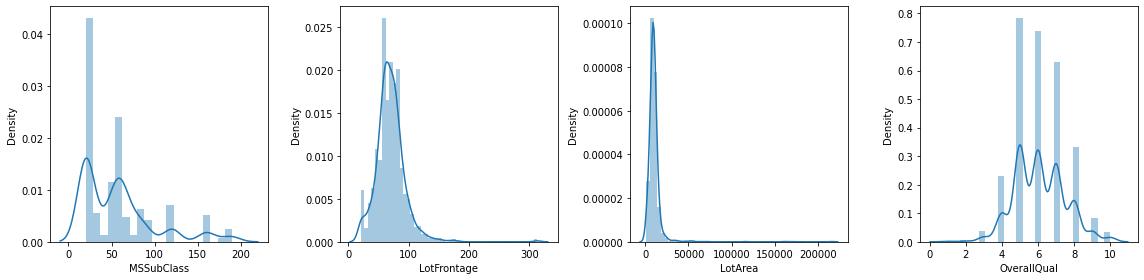

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

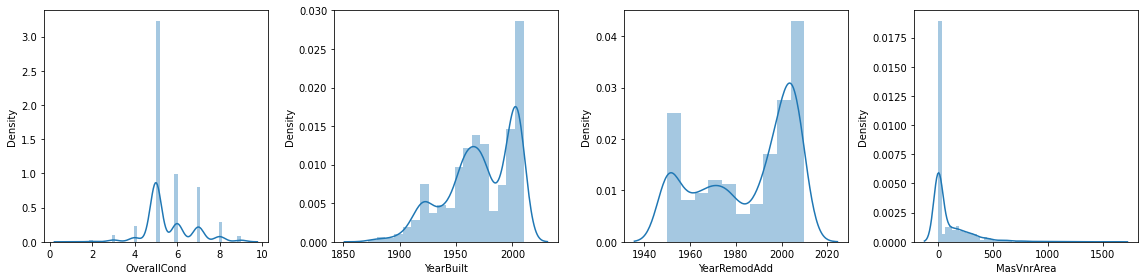

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

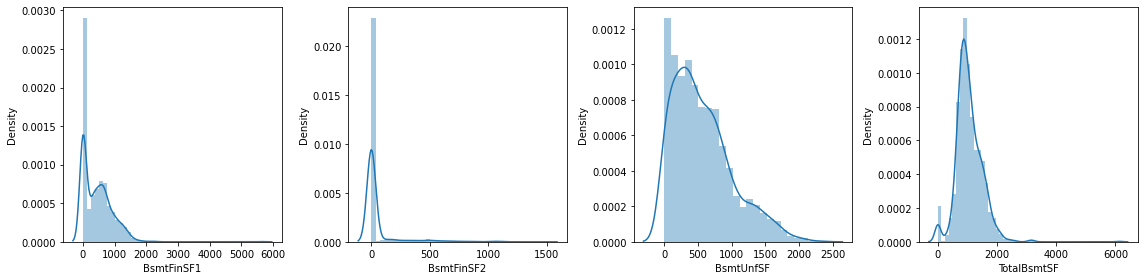

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

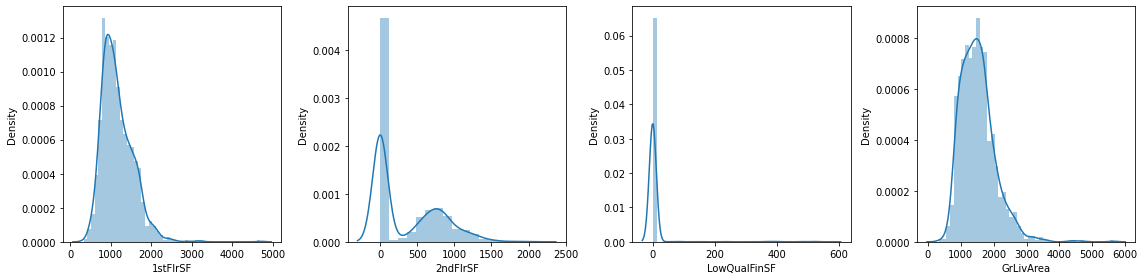

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

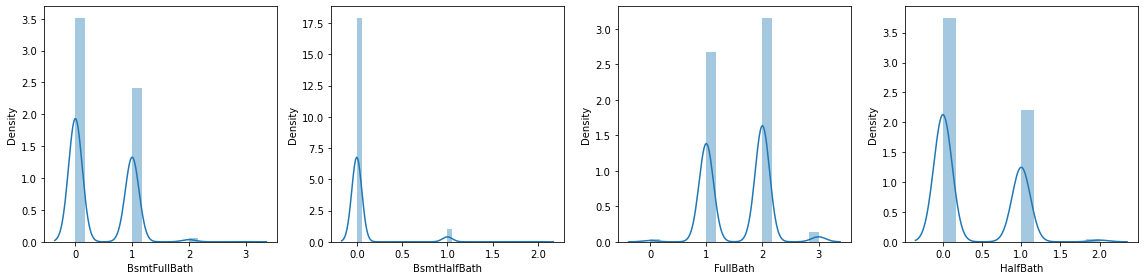

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

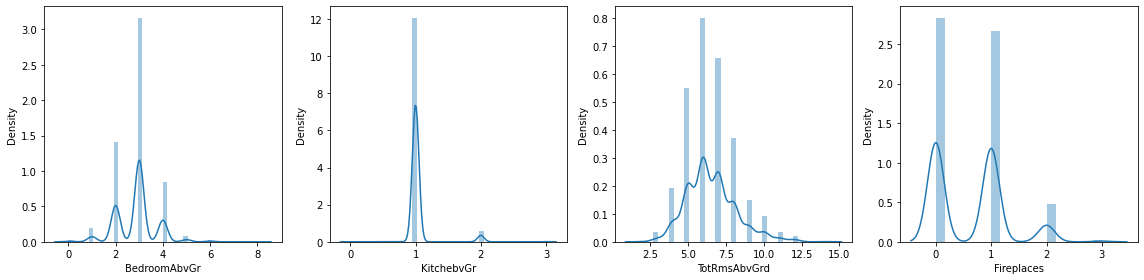

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

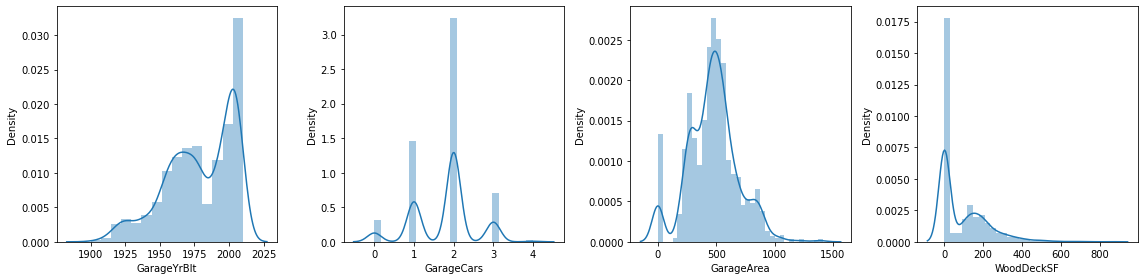

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

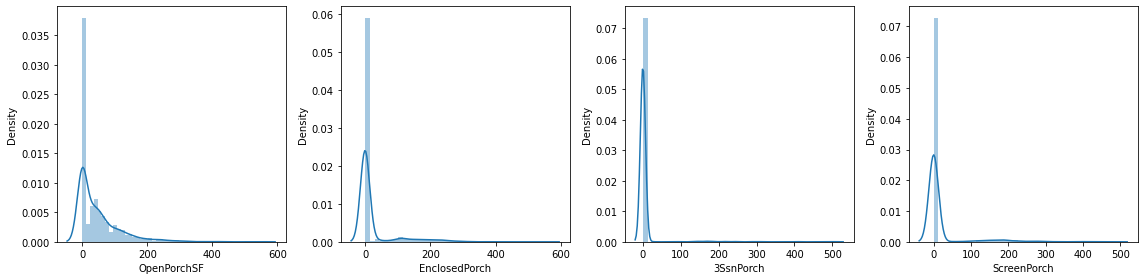

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

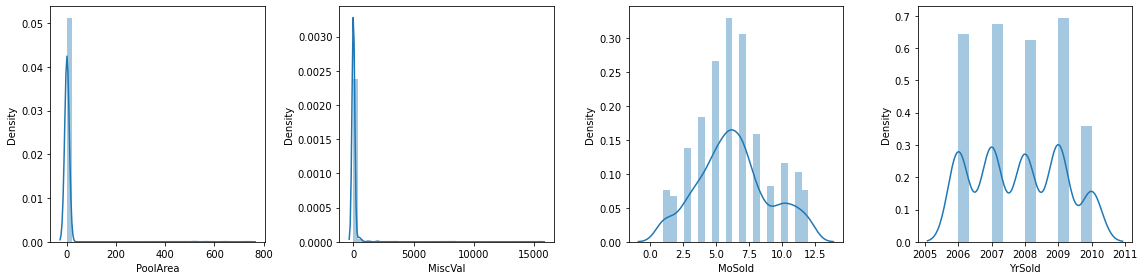

In [ ]:
#d.	Pair plot for distribution and density
for i in range(1, len(numerical_feature_columns),4): #start,stop, jump
    plt.figure(figsize=(16,4))  # total area for plot are
    plt.subplot(141)   #make a subplot   1x2  1 axis   could be a plot if only one
    sns.distplot(houses_ds[numerical_feature_columns[i]], hist=True, kde=True) # kde  kernel density estimation     more logical output on the shape of data dist
    if (i+1)<len(numerical_feature_columns):
        plt.subplot(142)    #make a subplot   1x2  2 axis
        sns.distplot(houses_ds[numerical_feature_columns[i+1]],kde=True)
    if (i+2)<len(numerical_feature_columns):
        plt.subplot(143)    #make a subplot   1x2  2 axis
        sns.distplot(houses_ds[numerical_feature_columns[i+2]],kde=True)
    if (i+3)<len(numerical_feature_columns):
        plt.subplot(144)    #make a subplot   1x2  2 axis
        sns.distplot(houses_ds[numerical_feature_columns[i+3]],kde=True)
    plt.tight_layout()
    plt.show()

## Categorical Variables

In [ ]:
#4.	EDA of categorical variables
#a.	Missing value treatment
print(houses_ds_categ.isna().any())
print(houses_ds_categ.shape)

categ_cols_withna = []
for (columnName, columnData) in houses_ds_categ.iteritems(): 
    if (columnData.isna().sum(axis=0) > 0):
        categ_cols_withna.append(columnName)
        print(columnName)
        print(columnData.isna().sum(axis=0))
        print ((columnData.isna().sum(axis=0)/houses_ds_categ.shape[0])*100)
        print(columnData.describe())
        print()

# Drop columns with high percentage of NaN values
print(houses_ds_categ.shape)
houses_ds_categ = houses_ds_categ.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)
print(houses_ds_categ.shape)

print(houses_ds_categ['GarageType'].unique())
# Replace missing values with the most frequent value
houses_ds_categ = houses_ds_categ.fillna(houses_ds_categ.mode().iloc[0])
print(houses_ds_categ['GarageType'].unique())
print(houses_ds_categ.shape)
print(houses_ds_categ.isna().any())

MSZoning         False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
KitchenQual      False
Functiol         False
FireplaceQu       True
GarageType        True
GarageFinish      True
GarageQual        True
GarageCond        True
PavedDrive       False
PoolQC            True
Fence             True
MiscFeature       True
SaleType         False
SaleCondition    False
dtype: bool

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\M

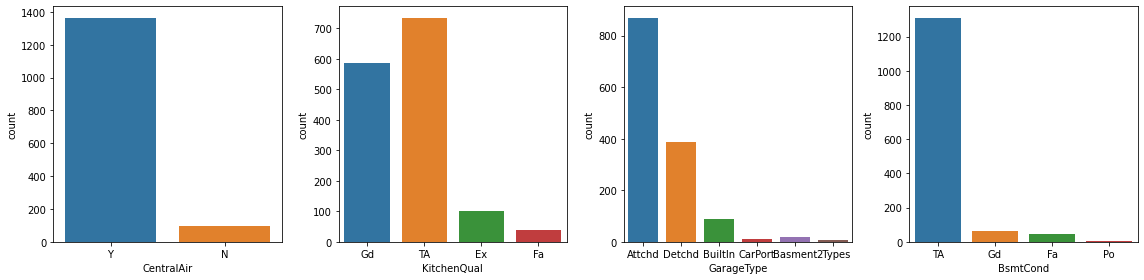

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\M

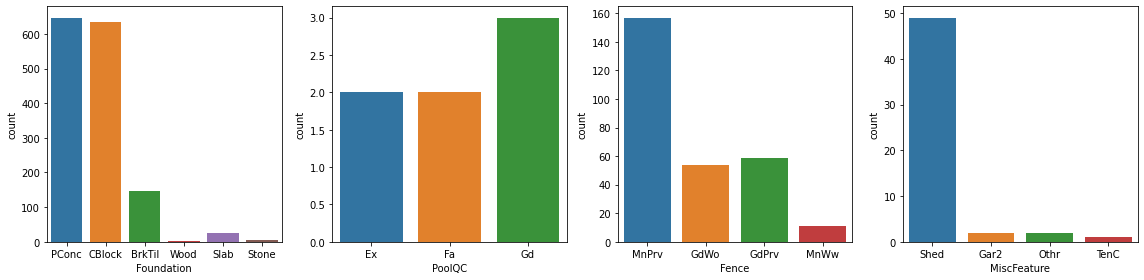

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\M

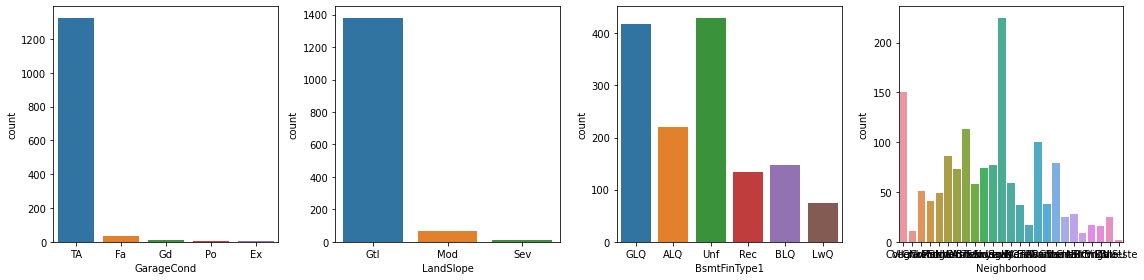

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\M

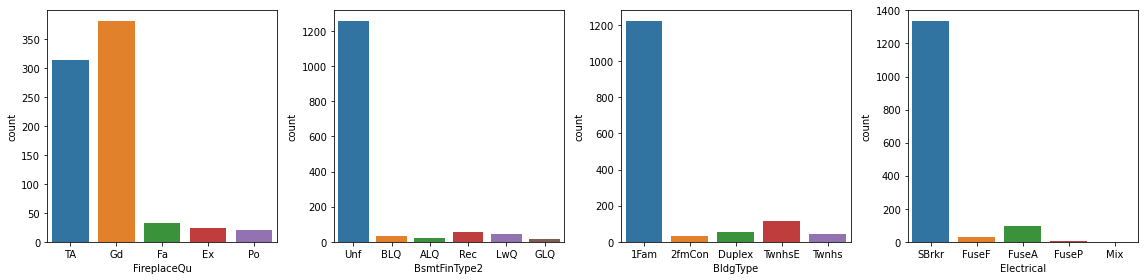

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\M

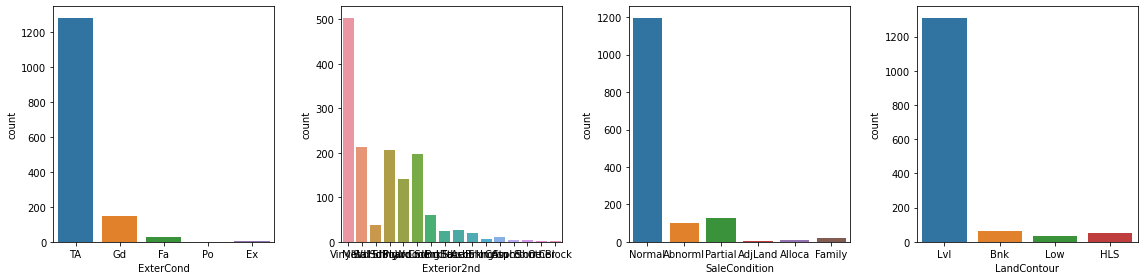

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\M

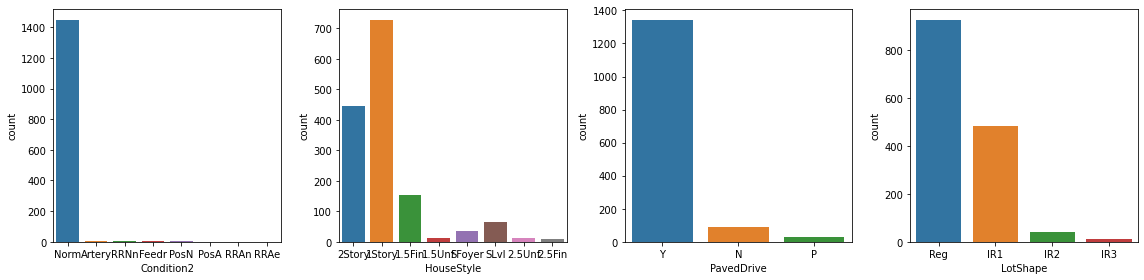

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\M

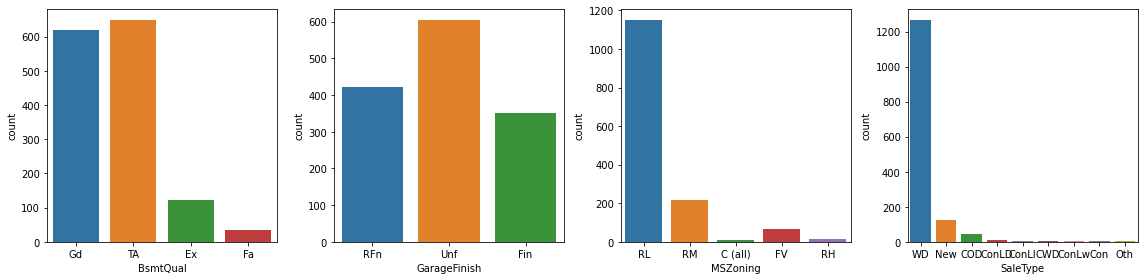

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\M

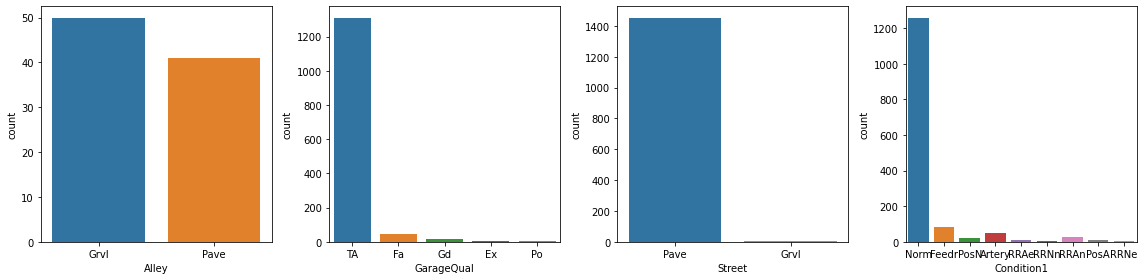

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\M

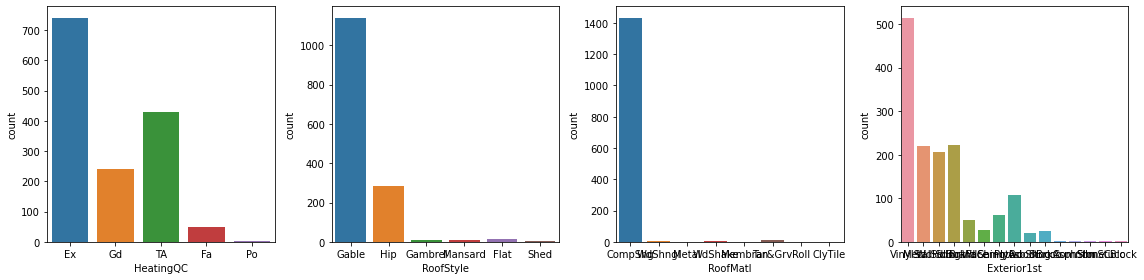

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\M

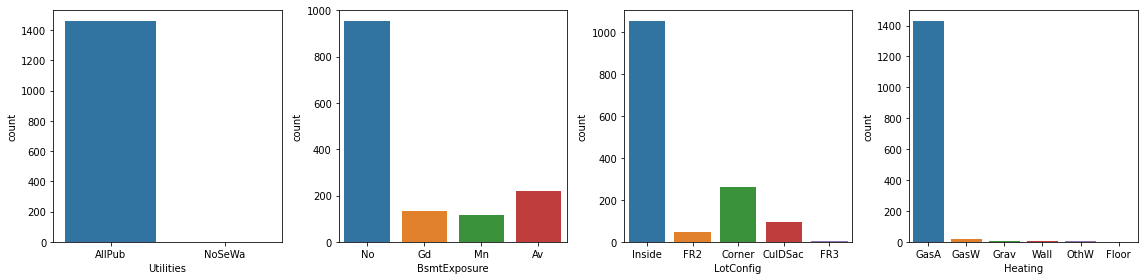

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


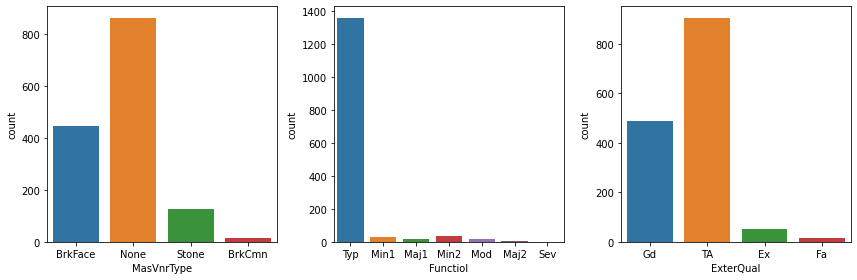

In [ ]:
#b.	Count plot and box plot for bivariate analysis
for i in range(0, len(categorical_feature_columns),4): #start,stop, jump
    plt.figure(figsize=(16,4))  # total area for plot are
    plt.subplot(141)   #make a subplot   1x2  1 axis   could be a plot if only one
    sns.countplot(houses_ds[categorical_feature_columns[i]], data=houses_ds) # kde  kernel density estimation     more logical output on the shape of data dist
    if (i+1)<len(categorical_feature_columns):
        plt.subplot(142)    #make a subplot   1x2  2 axis
        sns.countplot(houses_ds[categorical_feature_columns[i+1]])
    if (i+2)<len(categorical_feature_columns):
        plt.subplot(143)    #make a subplot   1x2  2 axis
        sns.countplot(houses_ds[categorical_feature_columns[i+2]])
    if (i+3)<len(categorical_feature_columns):
        plt.subplot(144)    #make a subplot   1x2  2 axis
        sns.countplot(houses_ds[categorical_feature_columns[i+3]])
    plt.tight_layout()
    plt.show()

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\h

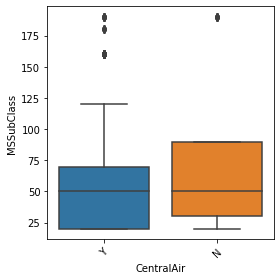

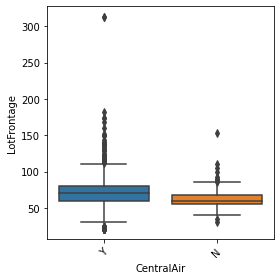

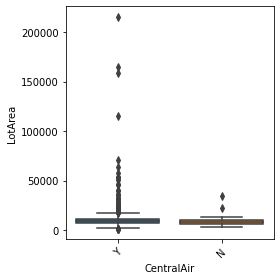

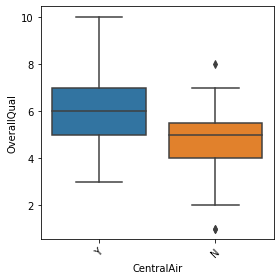

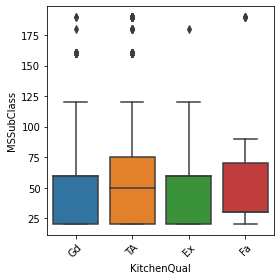

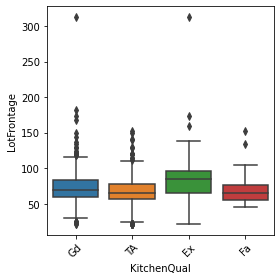

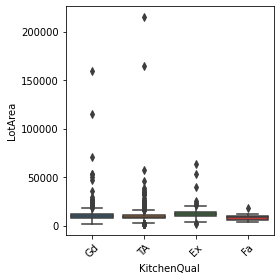

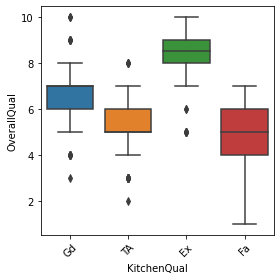

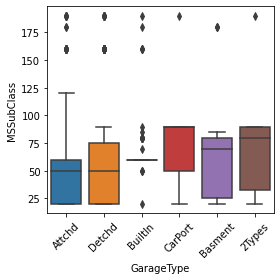

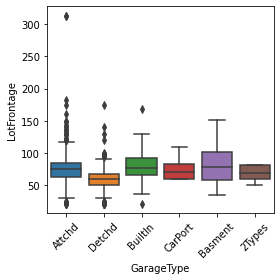

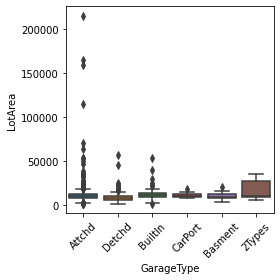

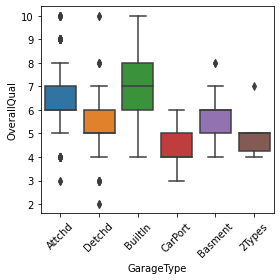

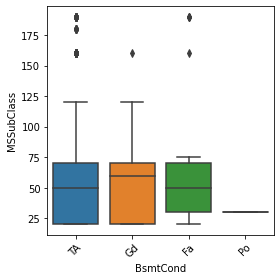

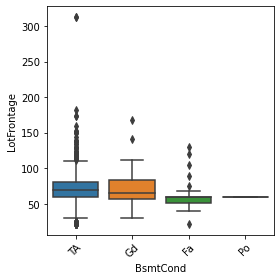

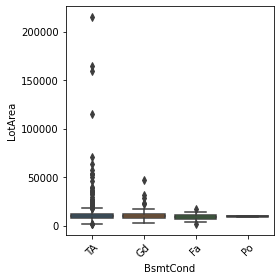

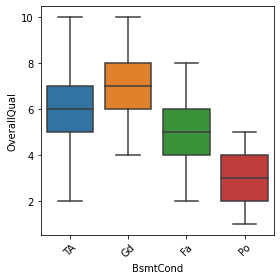

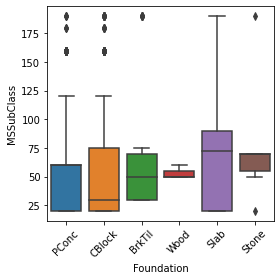

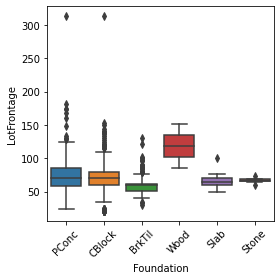

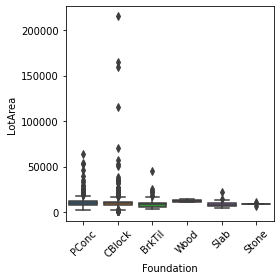

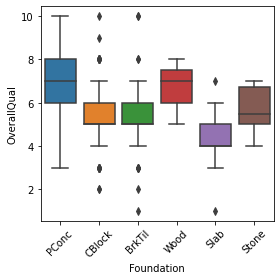

In [ ]:
#b.	Count plot and box plot for bivariate analysis
# Only showing 5 for example
for i in range(0, 5 ,1): # len(categorical_feature_columns)
    for j in range(1, 5 ,1):  # len(numerical_feature_columns)
        plt.figure(figsize=(4,4))
        plt.xticks(rotation=45)
        sns.boxplot(
            categorical_feature_columns[i],numerical_feature_columns[j],data=houses_ds
        )

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\h

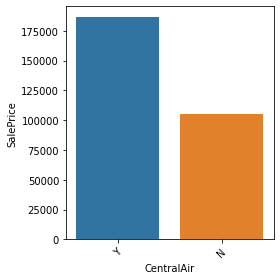

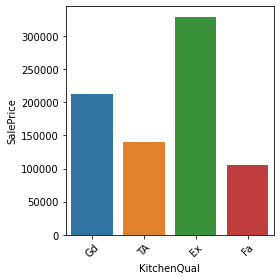

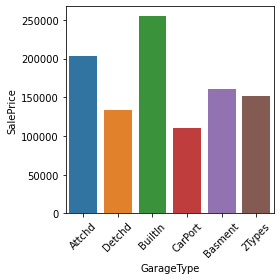

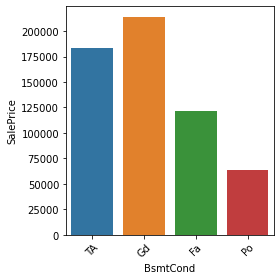

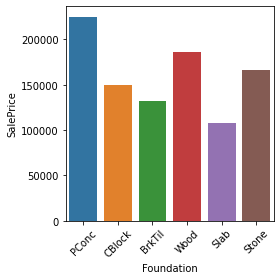

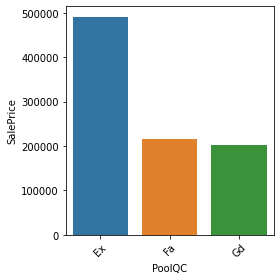

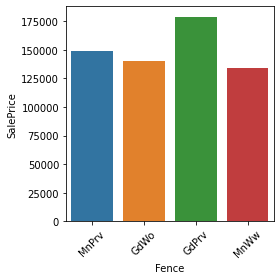

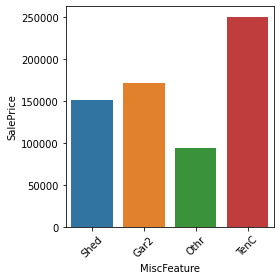

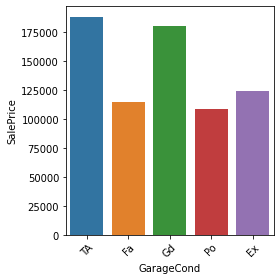

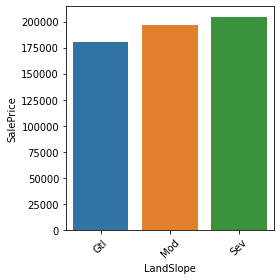

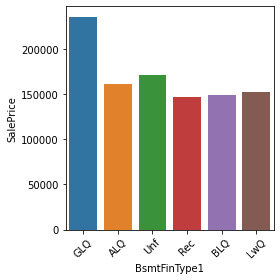

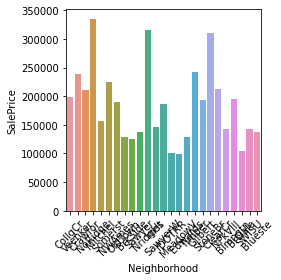

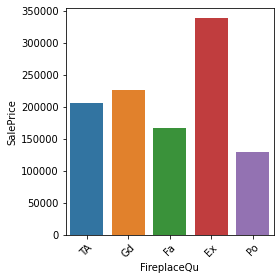

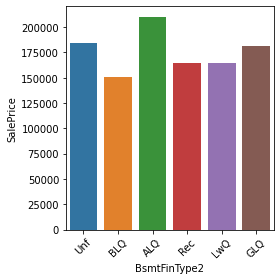

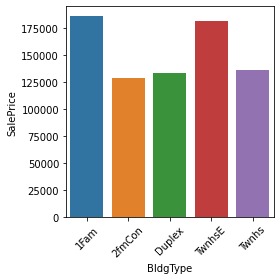

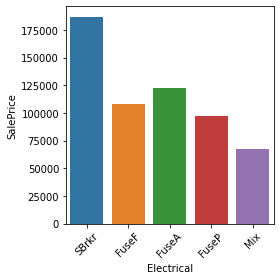

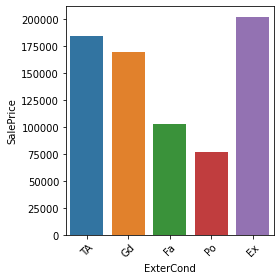

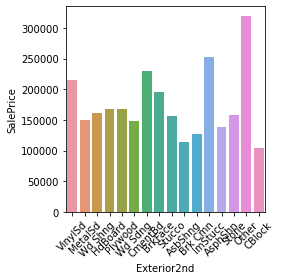

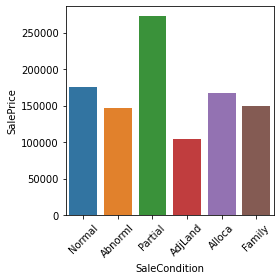

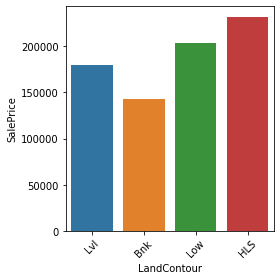

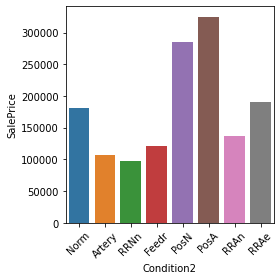

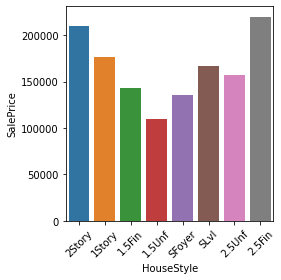

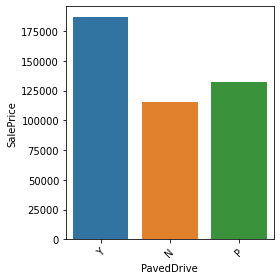

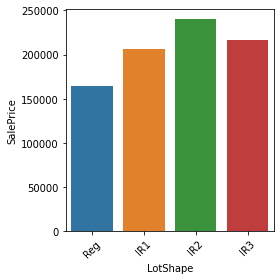

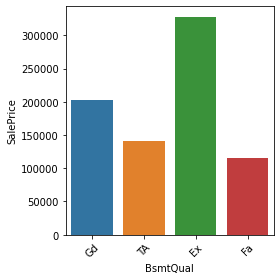

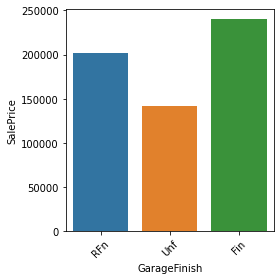

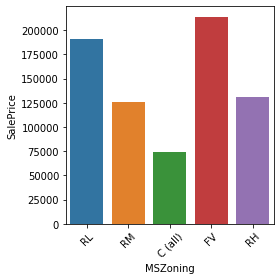

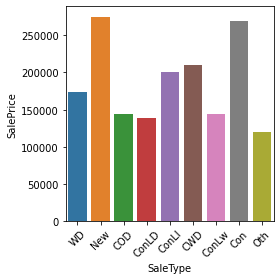

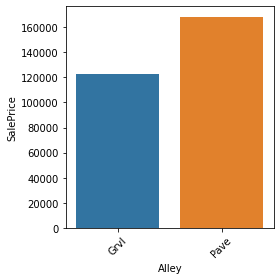

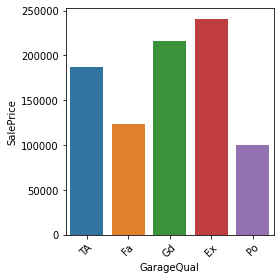

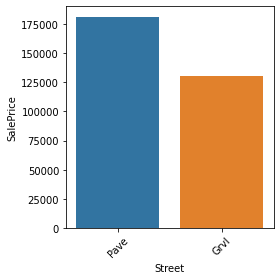

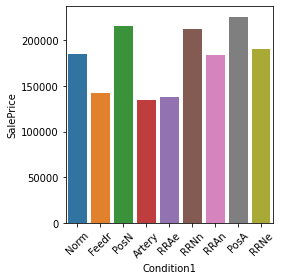

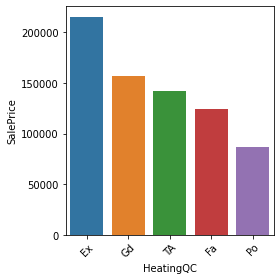

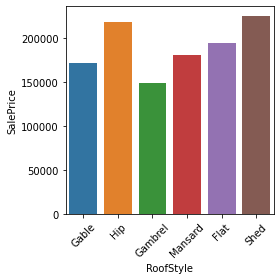

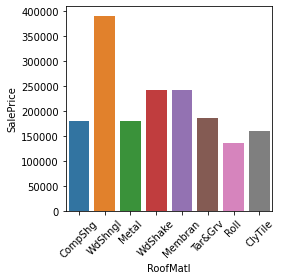

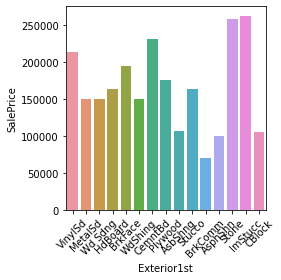

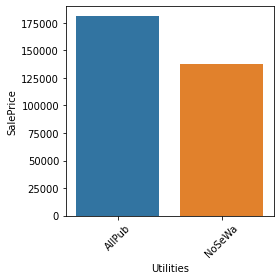

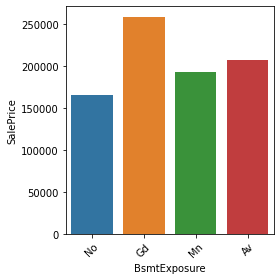

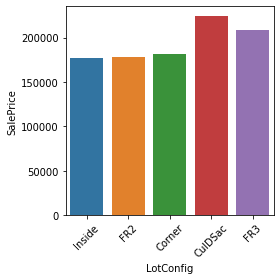

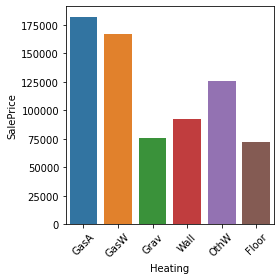

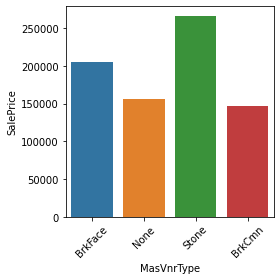

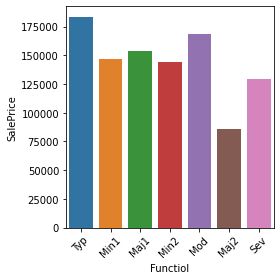

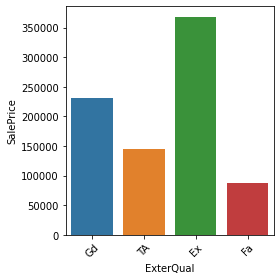

In [ ]:
#c.	Identify significant variables using p-values and Chi-Square values 

# plotting categ vars against target: SalePrice
for i in range(0, len(categorical_feature_columns),1): # len(categorical_feature_columns)
    plt.figure(figsize=(4,4))
    plt.xticks(rotation=45)
    sns.barplot(
        categorical_feature_columns[i],'SalePrice',data=houses_ds, ci=None
    )

In [ ]:
# Encode categorical values
for col in houses_ds_categ.columns:
    le.fit(houses_ds_categ[col])
    houses_ds_categ[col] = le.transform(houses_ds_categ[col])
    ca_labels = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f'{col} {ca_labels}')

MSZoning {'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4}
Street {'Grvl': 0, 'Pave': 1}
LotShape {'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3}
LandContour {'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3}
Utilities {'AllPub': 0, 'NoSeWa': 1}
LotConfig {'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4}
LandSlope {'Gtl': 0, 'Mod': 1, 'Sev': 2}
Neighborhood {'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5, 'Crawfor': 6, 'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'NPkVill': 12, 'NWAmes': 13, 'NoRidge': 14, 'NridgHt': 15, 'OldTown': 16, 'SWISU': 17, 'Sawyer': 18, 'SawyerW': 19, 'Somerst': 20, 'StoneBr': 21, 'Timber': 22, 'Veenker': 23, 'mes': 24}
Condition1 {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'PosN': 4, 'RRAe': 5, 'RRAn': 6, 'RRNe': 7, 'RRNn': 8}
Condition2 {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'PosN': 4, 'RRAe': 5, 'RRAn': 6, 'RRNn': 7}
BldgType {'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'Twnhs': 3, 'TwnhsE': 4}
H

In [ ]:
# Builds Contingency matrix and calculates CHI2 
from scipy.stats import chi2_contingency
nl = "\n"
for col1 in houses_ds_categ.columns:
    cnt = 0
    for col2 in houses_ds_categ.columns:
        if col1!=col2:
            crosstab = pd.crosstab(houses_ds_categ[col1], columns=houses_ds_categ[col2])
            chi2, p, dof, expected = stats.chi2_contingency(crosstab)
            if p < 0.05:
                cnt = cnt + 1
                #print(expected)
                #print(f"{col1} {col2}")
                print(f"{col1} {col2} Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
    #print(f"{cnt/len(houses_ds_categ.columns)} {col1}")

MSZoning Street Chi2 value= 94.74158356813642
p-value= 1.293331100878627e-19
Degrees of freedom= 4

MSZoning LotShape Chi2 value= 113.24940265552048
p-value= 1.3596271487657125e-18
Degrees of freedom= 12

MSZoning LandContour Chi2 value= 57.575367562852875
p-value= 6.221391677574749e-08
Degrees of freedom= 12

MSZoning LotConfig Chi2 value= 39.75180928087242
p-value= 0.0008462386541660305
Degrees of freedom= 16

MSZoning LandSlope Chi2 value= 23.035272160976675
p-value= 0.0033192548652162743
Degrees of freedom= 8

MSZoning Neighborhood Chi2 value= 2486.263987999627
p-value= 0.0
Degrees of freedom= 96

MSZoning Condition1 Chi2 value= 61.65564399422043
p-value= 0.0012526063553187693
Degrees of freedom= 32

MSZoning Condition2 Chi2 value= 48.09572431484875
p-value= 0.010464552603100549
Degrees of freedom= 28

MSZoning BldgType Chi2 value= 222.95209456537017
p-value= 1.7470289640148326e-38
Degrees of freedom= 16

MSZoning HouseStyle Chi2 value= 226.24471284092357
p-value= 6.69732027767283e

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = houses_ds_categ
y = houses_ds["SalePrice"]

chi2_selector = SelectKBest(chi2, k=10)
X_kbest = chi2_selector.fit_transform(X, y)

print(X_kbest)

print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)


[[ 3  0  5 ...  2  0  1]
 [ 3  0 23 ...  0  0  1]
 [ 0  0  5 ...  2  0  1]
 ...
 [ 3  0  6 ...  2  0  1]
 [ 3  0 24 ...  2  2  1]
 [ 3  0  7 ...  1  2  1]]
Original number of features: (1460, 39)
Reduced number of features: (1460, 10)


In [ ]:
# 
houses_ds_categ = houses_ds_categ.drop(['Neighborhood','GarageType','Exterior2nd','MSZoning','KitchenQual','HouseStyle','ExterQual','Exterior1st','BsmtQual','BsmtFinType1'],axis=1)
print(houses_ds_categ.shape)

(1460, 29)


## Combine both categorical and numerical

In [ ]:
#5.	Combine all the significant categorical and numerical variables

print(houses_ds_categ.shape)
print(houses_ds_num.shape)
houses_full = pd.concat([houses_ds_categ,houses_ds_num],axis=1, join='inner')
print(houses_full.describe())
print(houses_full.shape)

(1460, 29)
(1460, 29)
            Street     LotShape  LandContour    Utilities    LotConfig  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.995890     1.942466     2.777397     0.000685     3.019178   
std       0.063996     1.409156     0.707666     0.026171     1.622634   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     3.000000     0.000000     2.000000   
50%       1.000000     3.000000     3.000000     0.000000     4.000000   
75%       1.000000     3.000000     3.000000     0.000000     4.000000   
max       1.000000     3.000000     3.000000     1.000000     4.000000   

         LandSlope   Condition1   Condition2     BldgType    RoofStyle  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean      0.062329     2.031507     2.008219     0.493151     1.410274  ...   
std       0.276232     0.868515     0.259040     1.198277     0.834998  ..

C:\Users\harceroj\AppData\Local\Temp\ipykernel_1676\1143017873.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(4,4))


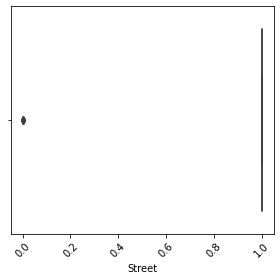

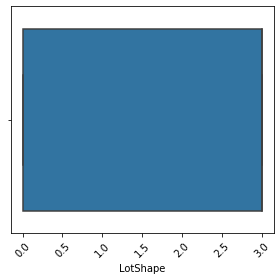

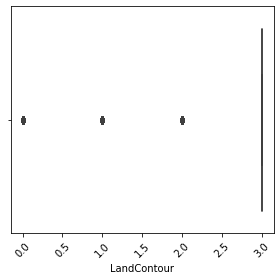

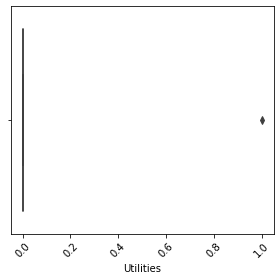

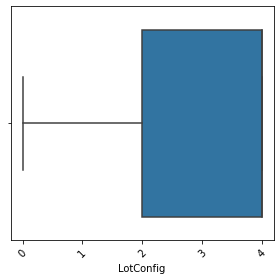

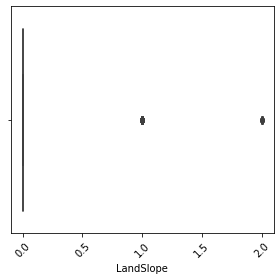

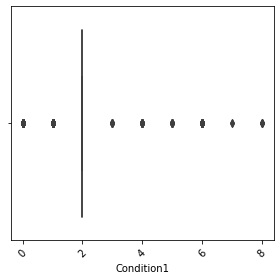

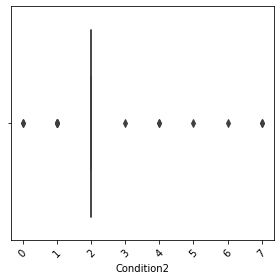

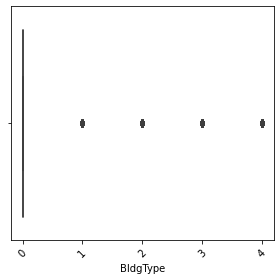

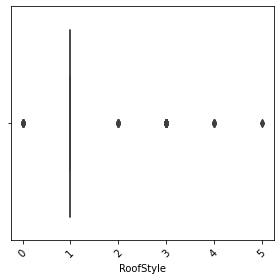

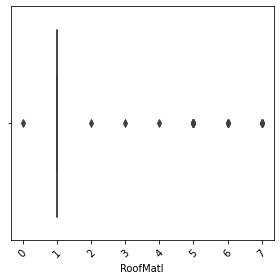

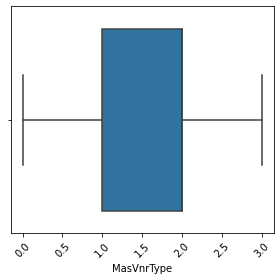

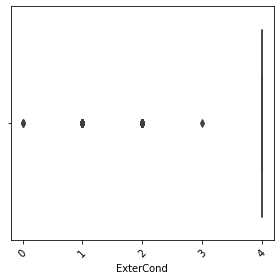

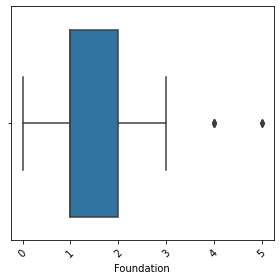

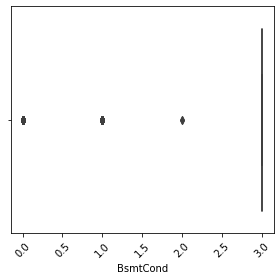

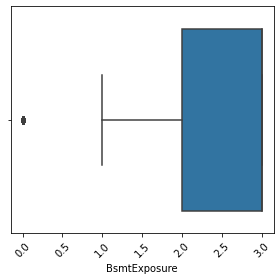

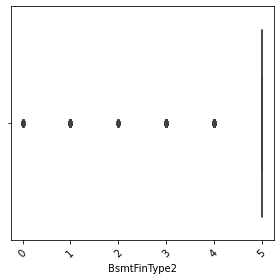

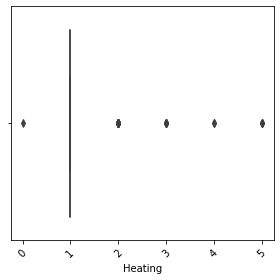

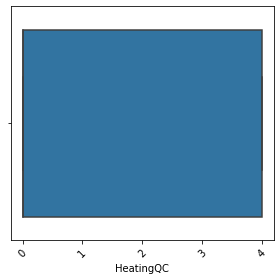

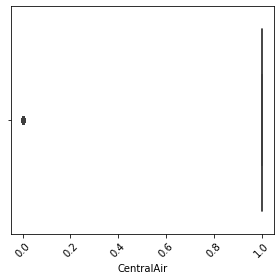

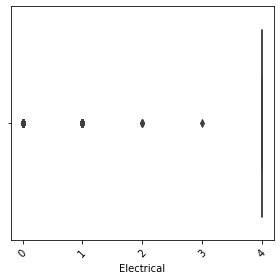

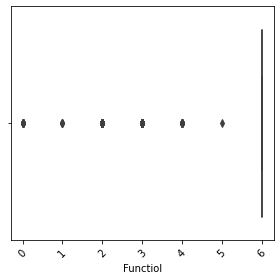

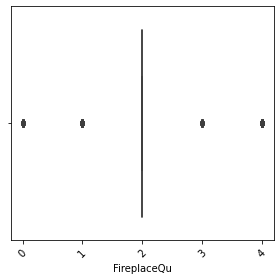

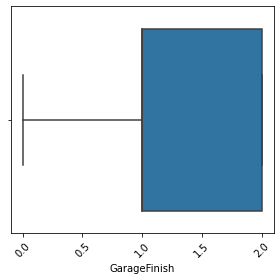

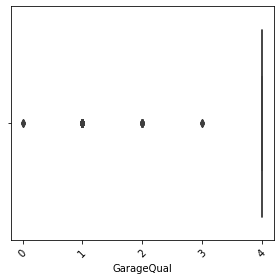

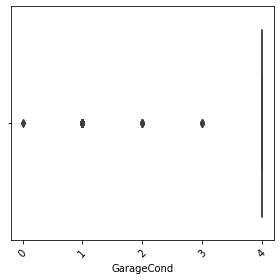

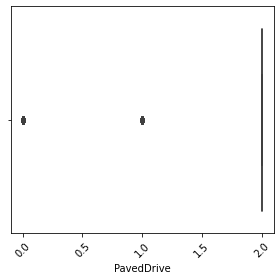

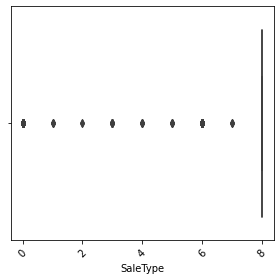

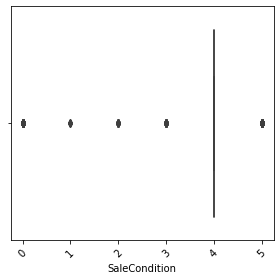

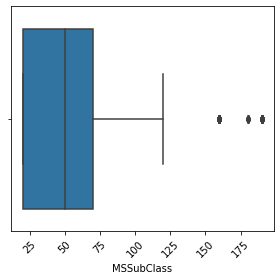

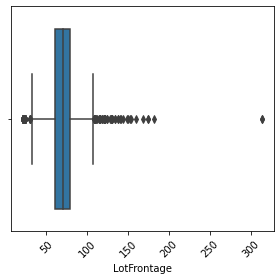

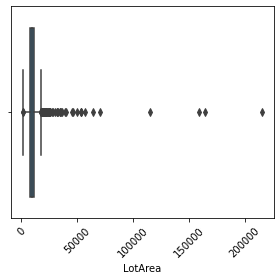

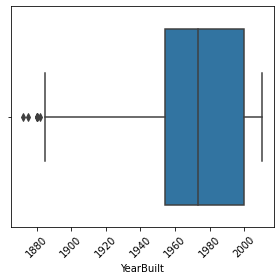

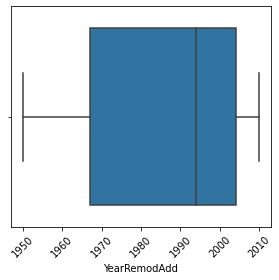

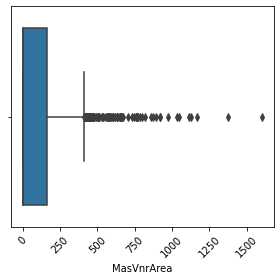

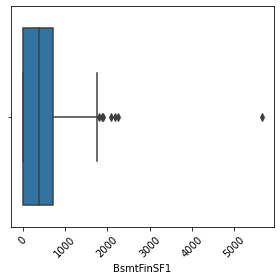

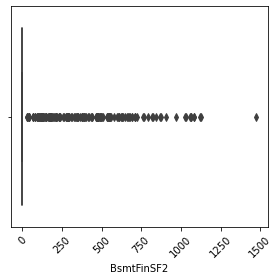

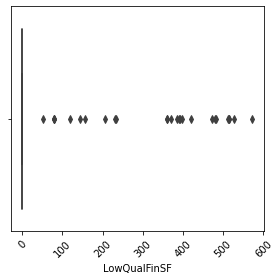

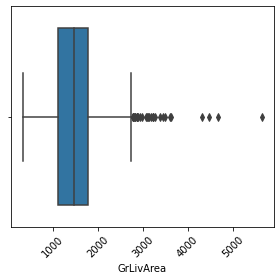

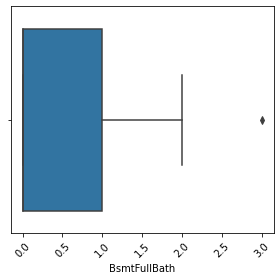

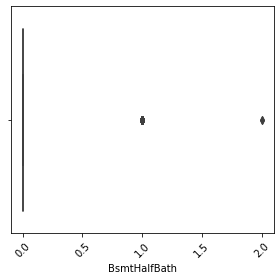

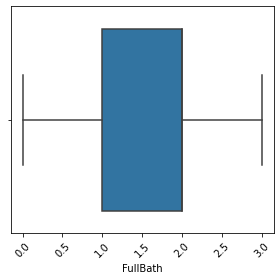

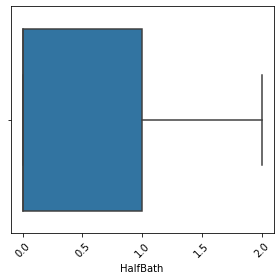

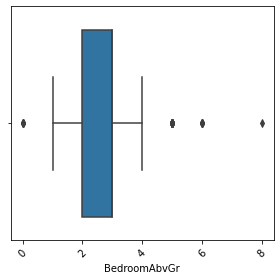

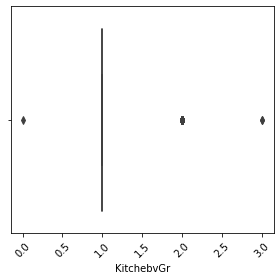

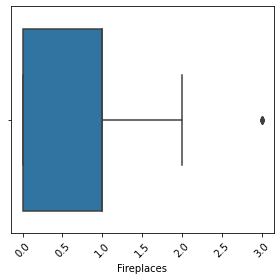

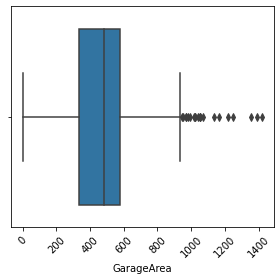

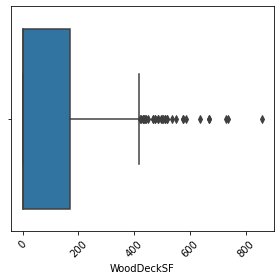

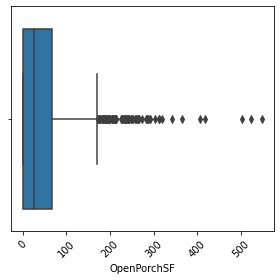

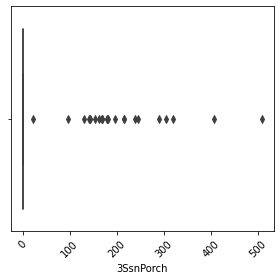

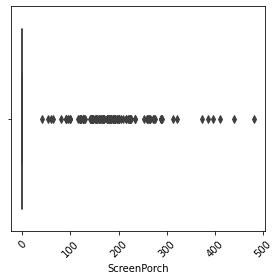

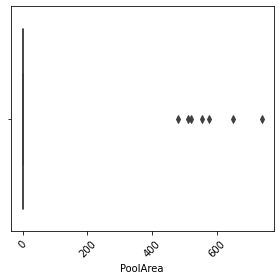

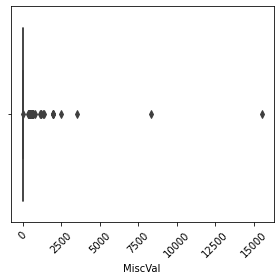

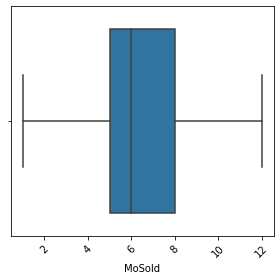

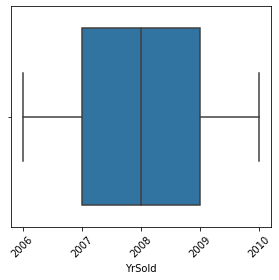

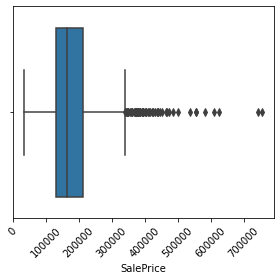

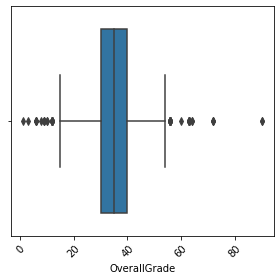

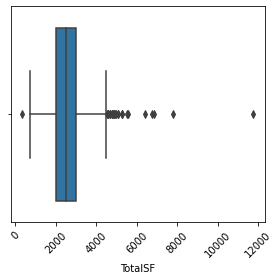

In [ ]:
#6.	Plot box plot for the new dataset to find the variables with outliers
for col in houses_full.columns: # len(categorical_feature_columns)
    plt.figure(figsize=(4,4))
    plt.xticks(rotation=45)
    sns.boxplot(x=houses_full[col])